In [1]:
%reset
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.ticker as mticker
import warnings; warnings.filterwarnings('ignore')
import cmocean

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [32]:
%cd /archive/ogrp/CMIP6/OMIP/warsaw_201803_mom6_2018.04.06
%cd OM4p25_IAF_BLING_CFC_csf/gfdl.ncrc4-intel16-prod/pp/ice
fs=xr.open_dataset('ice.static.nc')
lon=fs['GEOLON']; lat=fs['GEOLAT']
print(fs)
%cd ts/monthly/5yr/

/arch9/ogrp/CMIP6/OMIP/warsaw_201803_mom6_2018.04.06
/arch9/ogrp/CMIP6/OMIP/warsaw_201803_mom6_2018.04.06/OM4p25_IAF_BLING_CFC_csf/gfdl.ncrc4-intel16-prod/pp/ice
<xarray.Dataset>
Dimensions:    (xT: 1440, xTe: 1441, yT: 1080, yTe: 1081)
Coordinates:
  * xT         (xT) float64 -299.7 -299.5 -299.2 -299.0 ... 59.53 59.78 60.03
  * xTe        (xTe) float64 -299.8 -299.6 -299.3 -299.1 ... 59.66 59.91 60.16
  * yT         (yT) float64 -80.39 -80.31 -80.23 -80.15 ... 89.73 89.84 89.95
  * yTe        (yTe) float64 -80.43 -80.35 -80.27 -80.19 ... 89.78 89.89 90.0
Data variables:
    CELL_AREA  (yT, xT) float32 ...
    COSROT     (yT, xT) float32 ...
    GEOLAT     (yT, xT) float32 ...
    GEOLON     (yT, xT) float32 ...
    SINROT     (yT, xT) float32 ...
Attributes:
    filename:   ice.static.nc
    title:      OM4p25_IAF_BLING_CFC_csf
    grid_type:  regular
    grid_tile:  N/A
/arch9/ogrp/CMIP6/OMIP/warsaw_201803_mom6_2018.04.06/OM4p25_IAF_BLING_CFC_csf/gfdl.ncrc4-intel16-prod/pp/ice/ts/mo

In [41]:
data=xr.open_dataset('ice.200301-200712.sitimefrac.nc')['time']
i=51 #month starting from 2003-01-01
a=str(data[i].values); title=a
print(title)

IF=xr.open_dataset('ice.200301-200712.sitimefrac.nc')['sitimefrac'][i,:,:]
IT=xr.open_dataset('ice.200301-200712.sithick.nc')['sithick'][i,:,:]
print(IF)
print(IT)
#CN=xr.open_dataset('ice.200301-200712.CN.nc')['CN'][i,0,:,:]#ice concentration, 0-1
#ct=xr.open_dataset('ice.200301-200712.CN.nc')['ct'][0]; print(ct)
#CN.shape
#print(CN)

#u =  xr.open_dataset('ocean_daily.20030101-20071231.ssu.nc')['ssu'][i,::]
#v =  xr.open_dataset('ocean_daily.20030101-20071231.ssv.nc')['ssv'][i,::]


2007-04-16 00:00:00
<xarray.DataArray 'sitimefrac' (yT: 1080, xT: 1440)>
[1555200 values with dtype=float32]
Coordinates:
    time     object 2007-04-16 00:00:00
  * xT       (xT) float64 -299.7 -299.5 -299.2 -299.0 ... 59.53 59.78 60.03
  * yT       (yT) float64 -80.39 -80.31 -80.23 -80.15 ... 89.73 89.84 89.95
Attributes:
    long_name:      time fraction of ice cover
    units:          0-1
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT
<xarray.DataArray 'sithick' (yT: 1080, xT: 1440)>
[1555200 values with dtype=float32]
Coordinates:
    time     object 2007-04-16 00:00:00
  * xT       (xT) float64 -299.7 -299.5 -299.2 -299.0 ... 59.53 59.78 60.03
  * yT       (yT) float64 -80.39 -80.31 -80.23 -80.15 ... 89.73 89.84 89.95
Attributes:
    long_name:      ice thickness
    units:          m-ice
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT


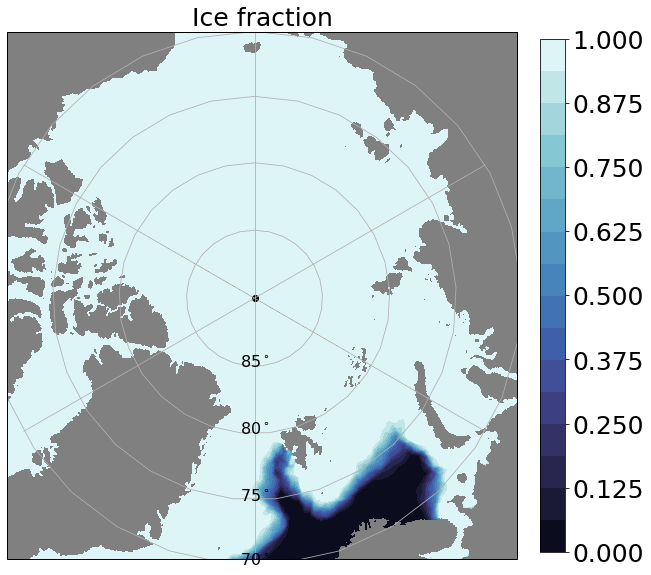

In [42]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.Orthographic(0, 90))
ax.set_extent([-180, 180, 70, 90],ccrs.PlateCarree())

bins=np.linspace(0,1,17)
plt.contourf(lon,lat,IF,bins,transform=ccrs.PlateCarree(),cmap=cmocean.cm.ice,vmin=0,vmax=1.)

cbar=plt.colorbar(fraction=0.046, pad=0.04); cbar.ax.tick_params(labelsize=25);
gl=ax.gridlines(crs=ccrs.PlateCarree())
plt.title('Ice fraction', fontsize=25)
gl.ylocator = mticker.FixedLocator([70, 75, 80, 85, 90])

ax.scatter(180, 90, marker='o',c='black', transform=ccrs.PlateCarree())
pointx=[0,0,0,0]; pointy=[70,75,80,85]; text=['70$^\circ$','75$^\circ$','80$^\circ$','85$^\circ$']
for i in range(len(pointx)):
    ax.text(pointx[i],pointy[i],text[i],ha='center', transform=ccrs.PlateCarree(),fontsize=16,color='black')
ax.background_patch.set_facecolor(color = (0.5,0.5,0.5,1.0))



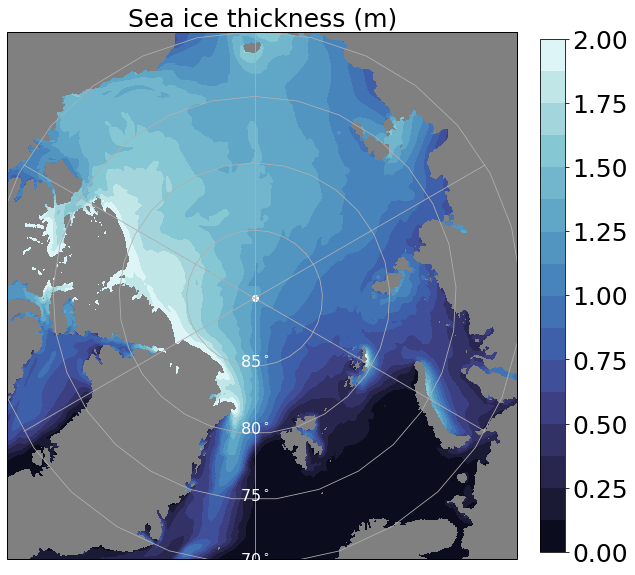

In [25]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.Orthographic(0, 90))
ax.set_extent([-180, 180, 70, 90],ccrs.PlateCarree())

bins=np.linspace(0,2,17)
plt.contourf(lon,lat,IT,bins,transform=ccrs.PlateCarree(),cmap=cmocean.cm.ice,vmin=0,vmax=2)

cbar=plt.colorbar(fraction=0.046, pad=0.04); cbar.ax.tick_params(labelsize=25);
gl=ax.gridlines(crs=ccrs.PlateCarree())
plt.title('Sea ice thickness (m)', fontsize=25)
gl.ylocator = mticker.FixedLocator([70, 75, 80, 85, 90])

ax.scatter(180, 90, marker='o',c='white', transform=ccrs.PlateCarree())
pointx=[0,0,0,0]; pointy=[70,75,80,85]; text=['70$^\circ$','75$^\circ$','80$^\circ$','85$^\circ$']
for i in range(len(pointx)):
    ax.text(pointx[i],pointy[i],text[i],ha='center', transform=ccrs.PlateCarree(),fontsize=16,color='white')
ax.background_patch.set_facecolor(color = (0.5,0.5,0.5,1.0))


In [14]:
bins=np.linspace(0,4,17)
print(bins)

[0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.   2.25 2.5  2.75 3.   3.25
 3.5  3.75 4.  ]
